<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


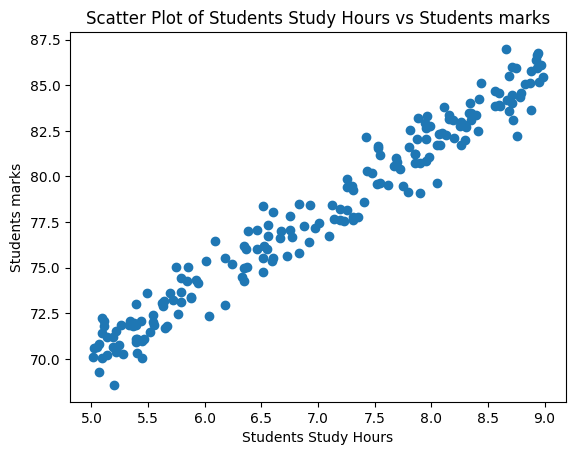

shape of X =  (200, 1)
shape of y =  (200, 1)
shape of X_train =  (160, 1)
shape of y_train =  (160, 1)
shape of X_test =  (40, 1)
shape of y_test =  (40, 1)


c:\Users\aniva\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\aniva\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


70.12594512018406

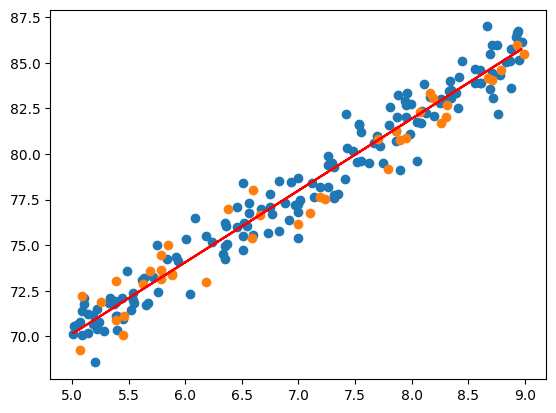

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv(r"C:\Users\aniva\Downloads\4. Students mark prediction\student_info.csv")

df.head()

df.tail()

df.shape

df.info()

df.describe()

plt.scatter(x =df.study_hours, y = df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")
plt.show()

df.isnull().sum()
df.mean()
df2 = df.fillna(df.mean())

df2.isnull().sum()
df2.head()

X = df2.drop("student_marks", axis = "columns")
y = df2.drop("study_hours", axis = "columns")
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

 # y = m * x + c
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)

lr.coef_
lr.intercept_


m = 3.93
c = 50.44
y  = m * 4 + c 
y
 
lr.predict([[4]])[0][0].round(2)

y_pred  = lr.predict(X_test)
y_pred

pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

lr.score(X_test,y_test)

plt.scatter(X_train,y_train)

plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")

import joblib
joblib.dump(lr, "student_mark_predictor.pkl")

model = joblib.load("student_mark_predictor.pkl")

model.predict([[5]])[0][0]


 

In [ ]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
from flask import Flask, request, render_template
import joblib
     
app = Flask(__name__)
model = joblib.load(r"C:\Users\aniva\student_mark_predictor.pkl")


df = pd.DataFrame()

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():
    global df
    
    input_features = [int(x) for x in request.form.values()]
    features_value = np.array(input_features)
    
    #validate input hours
    if input_features[0] <0 or input_features[0] >24:
        return render_template('index.html', prediction_text='Please enter valid hours between 1 to 24 if you live on the Earth')
        

    output = model.predict([features_value])[0][0].round(2)

    # input and predicted value store in df then save in csv file
    df= pd.concat([df,pd.DataFrame({'Study Hours':input_features,'Predicted Output':[output]})],ignore_index=True)
    print(df)   
    df.to_csv('smp_data_from_app.csv')

    return render_template('index.html', prediction_text='You will get [{}%] marks, when you do study [{}] hours per day '.format(output, int(features_value[0])))



if __name__ == "__main__":
    app.run(host='127.0.0.1', port=5000)

#if __name__ == "__main__":
#    app.run(host='0.0.0.0', port=8080)
    

 * Serving Flask app '__main__'
 * Debug mode: off


c:\Users\aniva\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator LinearRegression from version 1.4.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
[2024-10-25 18:51:30,602] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "c:\Users\aniva\AppData\Local\Programs\Python\Python37\lib\site-packages\flask\app.py", line 2529, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\Users\aniva\AppData\Local\Programs\Python\Python37\lib\site-packages\flask\app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\Users\aniva\AppData\Local\Programs\Python\Python37\lib\site-packages\flask\app.py", li

In [ ]:
from flask import Flask

app = Flask(__name__)

@app.route('/')
def index():
    return 'MY NAME IS YUDHISHTHIRA'

#app.run(host='0.0.0.0', port=81)

app.run(host ='127.0.0.1', port=5000)




 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [25/Oct/2024 18:59:15] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Oct/2024 18:59:15] "GET /favicon.ico HTTP/1.1" 404 -
